In [25]:
# Universidad del Valle de Guatemala
# Cifrado de Información
# Laboratorio 3
#
# Andrei Portales 19825
# Jose Javier Hurtarte 19707
# Christian Pérez 19710

import numpy as np
import random
import re
import matplotlib.pyplot as plt
from PIL import Image
from skimage.data import camera 
from functools import reduce

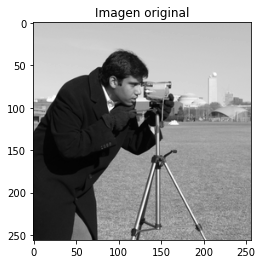

In [26]:

def xor(bits1, bits2):
    result = ''
    for n in range(len(bits1)):
        result += '0' if bits1[n] == bits2[n] else '1'
    return result

def bits2img(x, shape):
    m, n = shape
    I = np.zeros(m*n).astype(np.uint8)
    bts = re.findall('........', x)
    for i in range(0, len(bts)):
        I[i] = int(bts[i], 2)
    I = I.reshape(m,n)
    return I
def img2bits(I):
    m, n = I.shape
    s = ''
    for i in range(0, m):
        for j in range(0, n):
            s = s + '{0:08b}'.format(I[i,j])
    return s


I = camera()
J = Image.fromarray(I)
J = J.resize((J.size[0]//2, J.size[1]//2), Image.LANCZOS)
I = np.array(J)

bits = img2bits(I)
I2 = bits2img(bits, I.shape)



plt.figure()
plt.imshow(I2, cmap='gray')
plt.title("Imagen original")
plt.show()

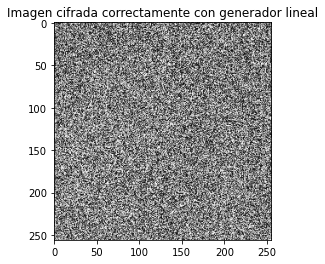

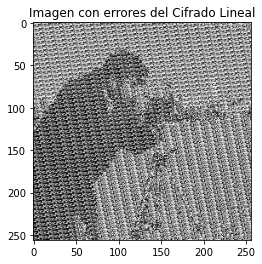

In [44]:
def linearGenerator(seed, m, a, c, n):
    # a: multiplicador
    # m: modulo
    # c: corrimiento
    # n: cantidad de numeros a generar

    randomNums = [0] * n
    randomNums[0] = seed

    for i in range(1, n):
        randomNums[i] = ((randomNums[i - 1] * a) + c) % m

    bits = ''.join(list(map(lambda x: '{0:08b}'.format(x), randomNums)))
    return bits

#Para una imagen bien cifrada

linearRandom = linearGenerator(31111, 1111111, 31, 100, int(len(bits)/8))

s = xor(bits, linearRandom)
IL = bits2img(s, I.shape)

plt.figure()
plt.imshow(IL, cmap='gray')
plt.title("Imagen cifrada correctamente con generador lineal")
plt.show()

#Para la imagen cifrada con errores

linearRandom2 = linearGenerator(68, 300, 31, 100, int(len(bits)/8))

s2 = xor(bits, linearRandom2)
IL2 = bits2img(s2, I.shape)

plt.figure()
plt.imshow(IL2, cmap='gray')
plt.title("Imagen con errores del Cifrado Lineal")
plt.show()

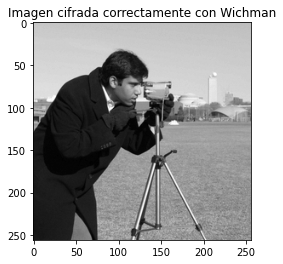

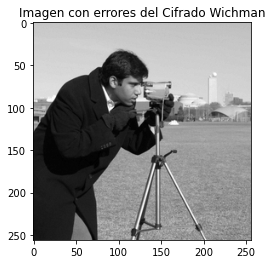

In [43]:
def wichmanGenerator(ss, n):
    s1 = ss[0]
    s2 = ss[1]
    s3 = ss[2]
    m1 = 30269
    m2 = 30307
    m3 = 30323

    randomNums = []

    for i in range(1, n + 1):
        s1 = (171 * s1) % m1
        s2 = (172 * s2) % m2
        s3 = (170 * s3) % m3
        v = ((s1 / m1) + (s2 / m2) + (s3 / m3))
        randomNums.append(v)

    bits = ''.join(list(map(lambda x: '{0:08b}'.format(int(x)), randomNums)))

    return bits

#Para una imagen bien cifrada

wichmanRandom = wichmanGenerator([111, 711, 313],  int(len(bits)/8))

s = xor(bits, wichmanRandom)
IW = bits2img(s, I.shape)

plt.figure()
plt.imshow(IW, cmap='gray')
plt.title("Imagen cifrada correctamente con Wichman")
plt.show()

#Para la imagen cifrada con errores

wichmanRandom2 = wichmanGenerator([2, 2, 2],  int(len(bits)/8))

s2 = xor(bits, wichmanRandom2)
IW2 = bits2img(s2, I.shape)

plt.figure()
plt.imshow(IW2, cmap='gray')
plt.title("Imagen con errores del Cifrado Wichman")
plt.show()

In [ ]:
#Suponiendo que se alimenta el primero
def lfsr(seed,n,step = 1,positions = []):
    def nextStep(chain):
        step = chain[:-1]
        return str(reduce(lambda i, j: int(i)^int(j), [chain[n] for n in positions])) + step
    result = ''
    current = '{0:b}'.format(seed)
    for x in range(1,(1 + n*step)):
        current = nextStep(current)
        if (x%step) ==0:
            result += current[-1]
        
    return result

#Para una imagen bien cifrada

lfsrRandom = lfsr(369112786, len(bits), positions =[1,6,7,13,14,18,21,27], step=3)

s = xor(bits, lfsrRandom)
IS = bits2img(s, I.shape)

plt.figure()
plt.imshow(IS, cmap='gray')
plt.title("Imagen cifrada correctamente con lfsr")
plt.show()

#Para la imagen cifrada con errores

lfsrRandom2 = lfsr(2002, len(bits), positions =[1,2], step=1)

s2 = xor(bits, lfsrRandom2)
IS2 = bits2img(s2, I.shape)

plt.figure()
plt.imshow(IS2, cmap='gray')
plt.title("Imagen con errores del Cifrado lfsr")
plt.show()